<a href="https://colab.research.google.com/github/jcarey-shu/dissertation/blob/main/dga_wo_whois_gscv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load 3 👇 : DGAs (+matsnu) SHU. GridSearchCV. Train & Test.

### Load 3 = 1000 legit domains; ~1000 word-based DGAs (+matsnu), no NaN; my top 10 correlated features; no WHOIS history. GridSearchCV. Train & Test.

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

def load_data1():
  return pd.read_csv(Path("/content/gdrive/MyDrive/Colab/Data/loads/raw_data/dga.concat.whois-history.csv"))

df1 = load_data1()

def load_data2():
  return pd.read_csv(Path("/content/gdrive/MyDrive/Colab/Data/loads/raw_data/tranco.1000+whois-history.csv"))

df2 = load_data2()

data_load = [df1, df2]
df = pd.concat(data_load).reset_index(drop=True)

Mounted at /content/gdrive


In [ ]:
display(df)

,domain,nlp_1g_25p,nlp_1g_50p,nlp_1g_75p,nlp_1g_cov,nlp_1g_dist,nlp_1g_dst_ca,nlp_1g_dst_ch,nlp_1g_dst_em,nlp_1g_dst_eu,...,nlp_r_num_odn,nlp_r_sym_2dn,nlp_r_sym_fqdn,nlp_r_sym_odn,nlp_r_vow_2dn,nlp_r_vow_fqdn,nlp_r_vow_odn,whois_rec,whois_change,class
0,abovelikely.net,0.0,0.0,0.071429,0.001473,11.0,30.998403,0.213426,8.859345,0.338570,...,0.0,0.0,0.066667,0.0,0.454545,0.400000,0.000000,7,0,1
1,actionmiddle.net,0.0,0.0,0.066667,0.001458,10.0,32.954127,0.132473,10.837800,0.348791,...,0.0,0.0,0.062500,0.0,0.416667,0.375000,0.000000,7,1,1
2,actionwindow.net,0.0,0.0,0.050000,0.001615,9.0,33.447768,0.162816,7.162251,0.342285,...,0.0,0.0,0.062500,0.0,0.416667,0.375000,0.000000,6,1,1
3,advanceforest.net,0.0,0.0,0.062500,0.001473,11.0,32.236734,0.186640,9.121134,0.342227,...,0.0,0.0,0.058824,0.0,0.384615,0.352941,0.000000,7,1,1
4,almostpeople.net,0.0,0.0,0.050000,0.001615,9.0,31.870029,0.199140,7.771134,0.344246,...,0.0,0.0,0.062500,0.0,0.416667,0.375000,0.000000,32,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,zillow.com,0.0,0.0,0.000000,0.001735,7.0,34.243527,0.208646,6.477723,0.387101,...,0.0,0.0,0.100000,0.0,0.333333,0.300000,0.000000,22,0,0
1782,zippyshare.com,0.0,0.0,0.076923,0.001253,12.0,33.245335,0.135381,7.077009,0.339747,...,0.0,0.0,0.071429,0.0,0.300000,0.285714,0.000000,19,0,0
1783,zoho.com,0.0,0.0,0.000000,0.002039,5.0,35.120871,0.304246,7.732746,0.461642,...,0.0,0.0,0.125000,0.0,0.500000,0.375000,0.000000,35,0,0
1784,zol.com.cn,0.0,0.0,0.000000,0.001817,6.0,34.230153,0.248091,8.643460,0.409966,...,0.0,0.0,0.200000,0.0,0.333333,0.200000,0.333333,13,1,0


In [ ]:
#df.drop("domain", axis=1, inplace=True)
# JC SHU Feature Selection
df.drop(df.columns.difference(['nlp_l_2dn','nlp_3g_dist','nlp_l_fqdn','nlp_1g_e','nlp_2g_dist', \
                               'nlp_2g_ken','nlp_2g_spe','nlp_3g_ken','nlp_3g_spe','nlp_3g_sumsq','class']), axis=1, inplace=True)
# UMU Feature Selection
#df.drop(df.columns.difference(['nlp_l_2dn','nlp_r_con_2dn','nlp_r_let_fqdn','nlp_1g_norm', \
#                               'nlp_1g_tpstd','nlp_2g_dst_em','nlp_2g_tpstd','nlp_3g_dst_em', \
#                               'nlp_3g_dst_eu','nlp_3g_norm','class']), axis=1, inplace=True)

In [ ]:
df.drop(df.columns.difference(['nlp_l_2dn','nlp_3g_dist','nlp_l_fqdn','nlp_1g_e','nlp_2g_dist', \
                               'nlp_2g_ken','nlp_2g_spe','nlp_3g_ken','nlp_3g_spe','nlp_3g_sumsq','class']), axis=1, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

nlp_1g_e        0
nlp_2g_dist     0
nlp_2g_ken      0
nlp_2g_spe      0
nlp_3g_dist     0
nlp_3g_ken      0
nlp_3g_spe      0
nlp_3g_sumsq    0
nlp_l_2dn       0
nlp_l_fqdn      0
class           0
dtype: int64

In [ ]:
df.dropna(how="any", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786 entries, 0 to 1785
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nlp_1g_e      1786 non-null   float64
 1   nlp_2g_dist   1786 non-null   float64
 2   nlp_2g_ken    1786 non-null   float64
 3   nlp_2g_spe    1786 non-null   float64
 4   nlp_3g_dist   1786 non-null   float64
 5   nlp_3g_ken    1786 non-null   float64
 6   nlp_3g_spe    1786 non-null   float64
 7   nlp_3g_sumsq  1786 non-null   float64
 8   nlp_l_2dn     1786 non-null   float64
 9   nlp_l_fqdn    1786 non-null   float64
 10  class         1786 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 167.4 KB


In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1] # the last column is the target

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

# Generate train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



In [ ]:
IMAGES_PATH = Path() / "gdrive" / "MyDrive" / "Colab" / "Data" / "images" / "dga"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=600):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
df.describe()

,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_dist,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,nlp_l_2dn,nlp_l_fqdn,class
count,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000
mean,3.145296,11.666853,0.145779,0.167450,11.044793,0.042166,0.043558,11.184211,10.002800,14.165733,0.441209
std,1.357105,4.317042,0.028297,0.032488,4.621980,0.009446,0.009758,4.767325,4.789869,4.650529,0.496671
min,0.482578,2.000000,0.061742,0.070932,1.000000,0.013004,0.013433,1.000000,1.000000,4.000000,0.000000
25%,1.981459,8.000000,0.123198,0.141534,7.000000,0.034403,0.035538,7.000000,6.000000,10.000000,0.000000
50%,3.151796,12.000000,0.150651,0.173074,11.000000,0.043124,0.044547,12.000000,10.000000,15.000000,0.000000
75%,4.114929,15.000000,0.168236,0.193276,14.000000,0.048649,0.050254,14.000000,13.000000,17.000000,1.000000
max,6.458008,23.000000,0.207672,0.238581,22.000000,0.060979,0.062992,26.000000,21.000000,25.000000,1.000000


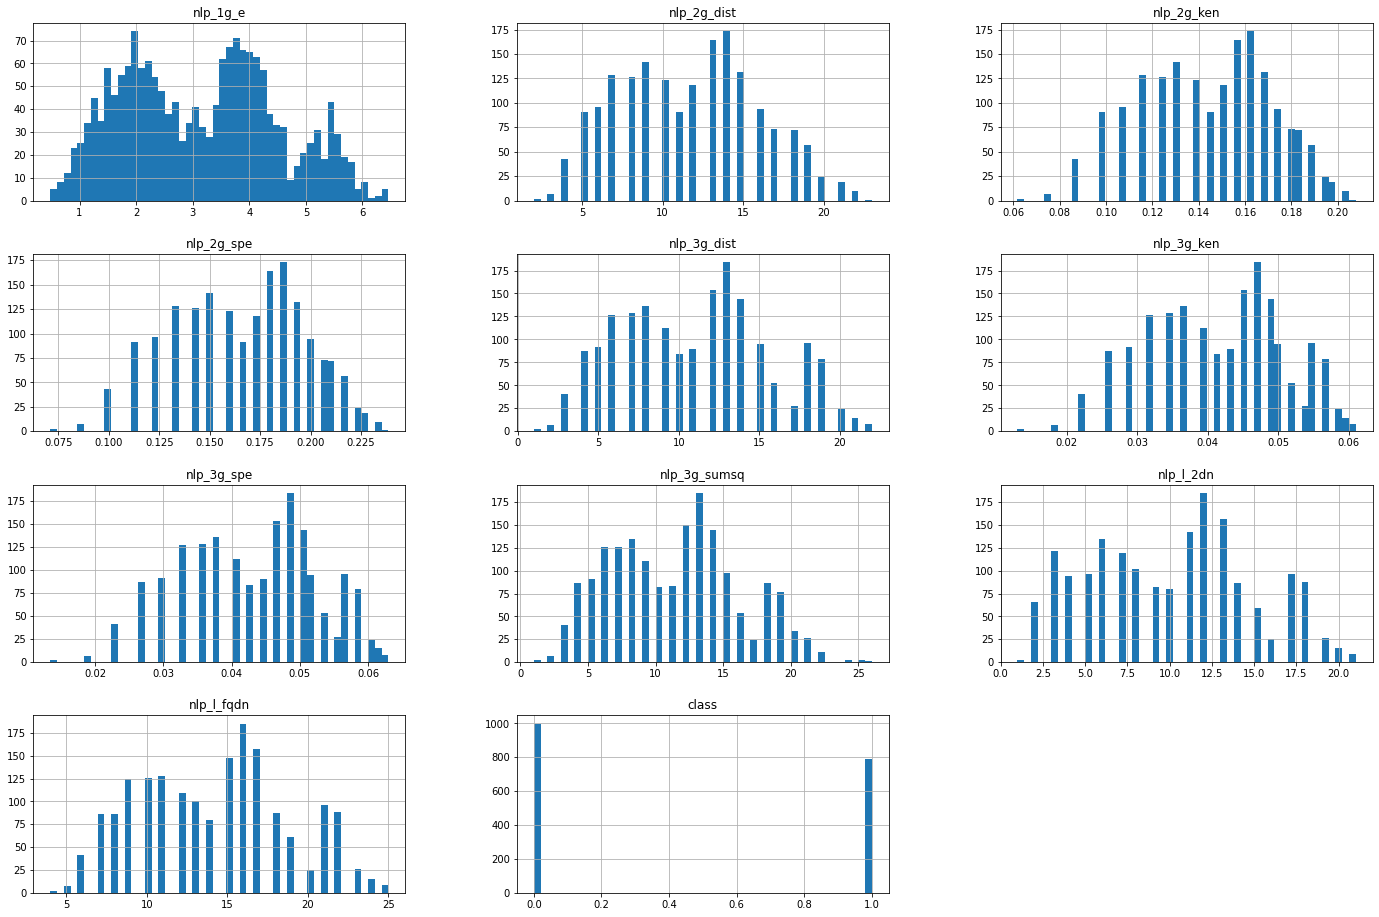

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(24, 16))
plt.show()

### Naive Bayes (NB) classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)


MultinomialNB()

In [ ]:
print(f"Naive Bayes scored {mnb_clf.score(X_test, y_test).round(5)} on test")
print(f"Naive Bayes scored {mnb_clf.score(X_train, y_train).round(5)} on train")

Naive Bayes scored 0.81903 on test
Naive Bayes scored 0.7672 on train


#### Confusion Matrix for mnb_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(mnb_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred).round(5)
cm

array([[667,  29],
       [259, 295]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.91049

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.53249

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.67198

<function matplotlib.pyplot.show(*args, **kw)>

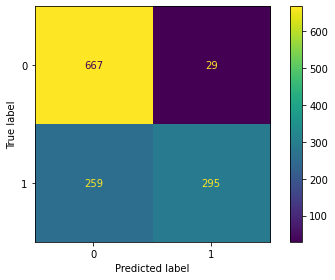

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("dga_wo_mnb_train_cm")
plt.show

#### Confusion Matrix for mnb_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(mnb_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred).round(5)
cm

array([[289,  13],
       [ 83, 151]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.92073

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.6453

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.75879

<function matplotlib.pyplot.show(*args, **kw)>

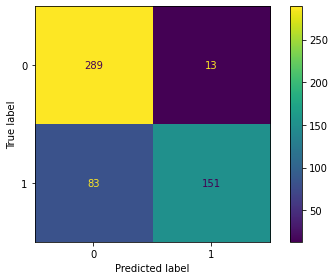

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("dga_wo_mnb_test_cm")
plt.show

### Logistic Regression (LG) classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(max_iter=1000)
lg_clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
print(f"Logistic Regression scored {lg_clf.score(X_test, y_test).round(5)} on test")
print(f"Logistic Regression scored {lg_clf.score(X_train, y_train).round(5)} on train")

Logistic Regression scored 0.93284 on test
Logistic Regression scored 0.9408 on train


#### Confusion Matrix for lg_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lg_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[644,  52],
       [ 27, 527]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.91019

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.95126

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.93027

<function matplotlib.pyplot.show(*args, **kw)>

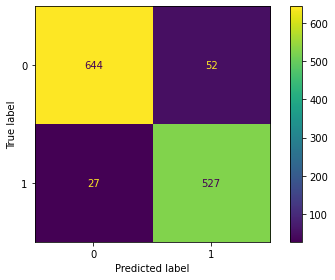

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("dga_wo_lg_train_cm")
plt.show

#### Confusion Matrix for lg_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(lg_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[275,  27],
       [ 17, 217]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.88934

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.92735

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.90795

<function matplotlib.pyplot.show(*args, **kw)>

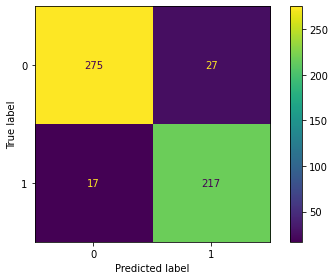

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("dga_wo_lg_test_cm")
plt.show

### K-Nearest Neighbours (KNN) classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn_clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute', n_jobs=-1)

In [ ]:
print(f"K-Nearest Neighbours scored {knn_clf.score(X_test, y_test).round(5)} on test")
print(f"K-Nearest Neighbours scored {knn_clf.score(X_train, y_train).round(5)} on train")

K-Nearest Neighbours scored 0.92724 on test
K-Nearest Neighbours scored 0.9416 on train


#### Confusion Matrix for knn_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[630,  66],
       [ 22, 532]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.88963

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.96029

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.92361

<function matplotlib.pyplot.show(*args, **kw)>

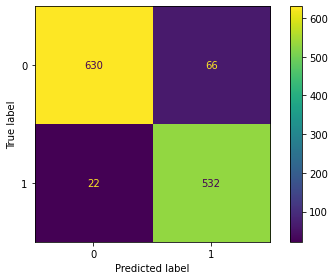

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("dga_wo_knn_train_cm")
plt.show

#### Confusion Matrix for knn_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(knn_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[271,  31],
       [ 11, 223]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.87795

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.95299

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.91393

<function matplotlib.pyplot.show(*args, **kw)>

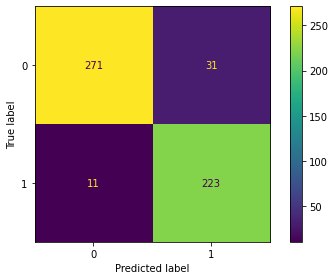

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("dga_wo_knn_test_cm")
plt.show

###✋Support Vector Machine (SVM) classifier

In [ ]:
# if we receive ConvergenceWarning then use:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_norm_svm = StandardScaler().fit_transform(X)

# Generate train/test sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_norm_svm, y, test_size=0.3, random_state=42
)

# re-run above LinearSVC


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svm_clf=LinearSVC(C=0.00001)
svm_clf.fit(X_train_svm, y_train_svm)
svm_clf1 = CalibratedClassifierCV(svm_clf)
svm_clf1.fit(X_train_svm, y_train_svm)


CalibratedClassifierCV(base_estimator=LinearSVC(C=1e-05))

In [ ]:
print(f"SVM scored {svm_clf.score(X_test_svm, y_test_svm).round(5)} on test")
print(f"SVM scored {svm_clf.score(X_train_svm, y_train_svm).round(5)} on train")

SVM scored 0.90485 on test
SVM scored 0.8992 on train


#### Confusion Matrix for svm_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_svm_pred = cross_val_predict(svm_clf, X_train_svm, y_train_svm, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_svm, y_train_svm_pred)
cm

array([[576, 120],
       [  6, 548]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_svm, y_train_svm_pred).round(5)

0.82036

In [ ]:
recall_score(y_train_svm, y_train_svm_pred).round(5)

0.98917

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_svm, y_train_svm_pred).round(5)

0.89689

<function matplotlib.pyplot.show(*args, **kw)>

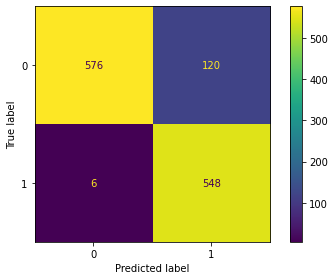

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train_svm, y_train_svm_pred)
save_fig("dga_wo_svm_train_cm")
plt.show

#### Confusion Matrix for svm_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_svm_pred = cross_val_predict(svm_clf, X_test_svm, y_test_svm, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_svm, y_test_svm_pred)
cm

array([[252,  50],
       [  2, 232]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_svm, y_test_svm_pred).round(5)

0.8227

In [ ]:
recall_score(y_test_svm, y_test_svm_pred).round(5)

0.99145

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test_svm, y_test_svm_pred).round(5)

0.89922

<function matplotlib.pyplot.show(*args, **kw)>

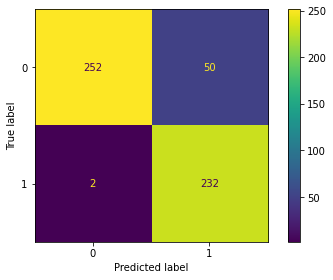

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_svm, y_test_svm_pred)
save_fig("dga_wo_svm_test_cm")
plt.show

### ✅Decision Tree (DT) classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint
dt_clf = DecisionTreeClassifier()


In [ ]:
print('Parameters currently in use:\n')
pprint(dt_clf.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [ ]:
param_grid = {'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10,15,20,30,40,50],
              'max_features': [1, 2, 3, 4,5,6,7,8,9,10],
              'random_state':[0, 1, 2, 3, 4, 5, 10, 15,20,35,50,80,100,150,180,200],
              'criterion':['gini','entropy'],
              }

In [ ]:
#GSCV_dt_clf = GridSearchCV(dt_clf, param_grid=param_grid, cv=10)
#GSCV_dt_clf.fit(X_train, y_train)

In [ ]:
#GSCV_dt_clf.best_params_

In [ ]:
dt_clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=7, random_state=80)

In [ ]:
dt_clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=7,
                       random_state=80)

In [ ]:
print(f"Decision Tree scored {dt_clf1.score(X_test, y_test).round(5)} on test")
print(f"Decision Tree scored {dt_clf1.score(X_train, y_train).round(5)} on train")

Decision Tree scored 0.9347 on test
Decision Tree scored 0.9448 on train


#### Confusion Matrix for dt_clf1 train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(dt_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[632,  64],
       [ 12, 542]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.89439

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.97834

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.93448

<function matplotlib.pyplot.show(*args, **kw)>

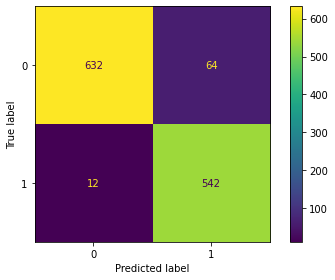

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("dga_wo_dt_train_cm")
plt.show

#### Confusion Matrix for dt_clf1 test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(dt_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[274,  28],
       [ 21, 213]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.88382

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.91026

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.89684

<function matplotlib.pyplot.show(*args, **kw)>

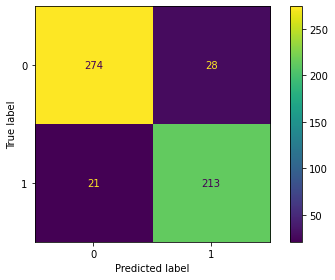

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("dga_wo_dt_test_cm")
plt.show

### Bagging Decision Tree (BG) classifier (ensemble)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg_clf=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5)

In [ ]:
print(f"Bagging Decision Tree scored {bg_clf.score(X_test, y_test).round(5)} on test")
print(f"Bagging Decision Tree scored {bg_clf.score(X_train, y_train).round(5)} on train")

Bagging Decision Tree scored 0.92537 on test
Bagging Decision Tree scored 0.9752 on train


#### Confusion Matrix for bg_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(bg_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[631,  65],
       [ 36, 518]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.88851

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.93502

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.91117

<function matplotlib.pyplot.show(*args, **kw)>

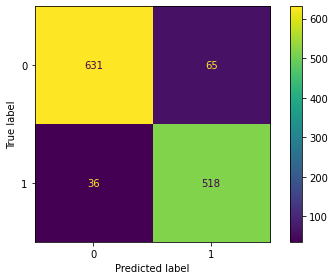

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("dga_wo_bg_train_cm")
plt.show

#### Confusion Matrix for bg_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(bg_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[271,  31],
       [ 23, 211]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.8719

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.90171

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.88655

<function matplotlib.pyplot.show(*args, **kw)>

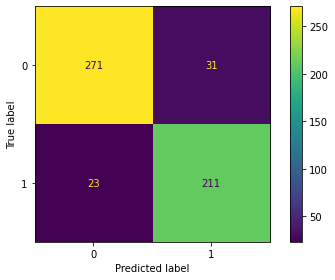

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("dga_wo_bg_test_cm")
plt.show

### ✅Boosting Decision Tree (ADB) classifier (ensemble). GridSearchCV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
adb_clf = AdaBoostClassifier(DecisionTreeClassifier())

In [ ]:
print('Parameters currently in use:\n')
pprint(adb_clf.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


In [ ]:
param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]
              }

In [ ]:
#GSCV_adb_clf = GridSearchCV(adb_clf, param_grid=param_grid, scoring='f1', n_jobs=-1)
#GSCV_adb_clf.fit(X_train, y_train)

In [ ]:
#GSCV_adb_clf.best_params_

In [ ]:
adb_clf1 = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=5,max_depth=2),n_estimators=10,learning_rate=0.1)

In [ ]:
adb_clf1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.1, n_estimators=10)

In [ ]:
print(f"AdaBoost Classifier scored {adb_clf1.score(X_test, y_test).round(5)} on test")
print(f"AdaBoost Classifier scored {adb_clf1.score(X_train, y_train).round(5)} on train")

AdaBoost Classifier scored 0.9347 on test
AdaBoost Classifier scored 0.944 on train


#### Confusion Matrix for adb_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(adb_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[638,  58],
       [ 18, 536]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.90236

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.96751

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.9338

<function matplotlib.pyplot.show(*args, **kw)>

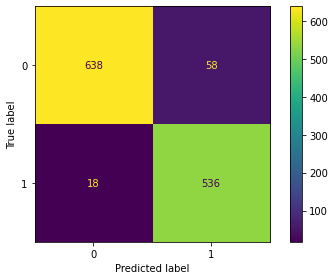

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("dga_wo_adb_train_cm")
plt.show

#### Confusion Matrix for adb_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(adb_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[269,  33],
       [ 15, 219]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.86905

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.9359

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.90123

<function matplotlib.pyplot.show(*args, **kw)>

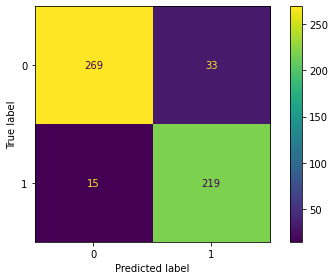

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("dga_wo_adb_test_cm")
plt.show

### ✅Random Forest (RF) classifier (ensemble)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
print('Parameters currently in use:\n')
pprint(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
#GSCV_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)
#GSCV_rf_clf.fit(X_train, y_train)


In [ ]:
#GSCV_rf_clf.best_params_

In [ ]:
rf_clf1 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=200, \
                                 max_depth=6, criterion='gini')

In [ ]:
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [ ]:
print(f"Random Forest scored {rf_clf1.score(X_test, y_test).round(5)} on test")
print(f"Random Forest scored {rf_clf1.score(X_train, y_train).round(5)} on train")

Random Forest scored 0.93657 on test
Random Forest scored 0.9504 on train


#### Confusion Matrix for rf_clf1 train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rf_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[631,  65],
       [ 15, 539]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.89238

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.97292

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.93092

<function matplotlib.pyplot.show(*args, **kw)>

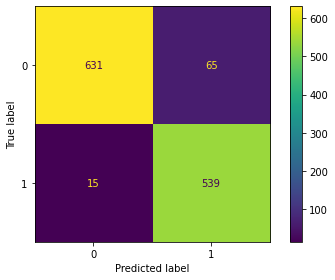

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("dga_wo_rf_train_cm")
plt.show

#### Confusion Matrix for rf_clf1 test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(rf_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[270,  32],
       [ 11, 223]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.87451

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.95299

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.91207

<function matplotlib.pyplot.show(*args, **kw)>

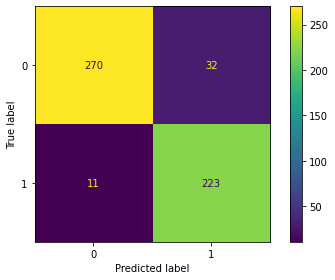

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("dga_wo_rf_test_cm")
plt.show

### 👉Receiver Operating Characteristic (ROC) curve

In [ ]:
rndm_probs = [0 for _ in range(len(y_test))]
mnb_probs = mnb_clf.predict_proba(X_test)
lg_probs = lg_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
svm_probs = svm_clf1.predict_proba(X_test_svm)
dt_probs = dt_clf1.predict_proba(X_test)
bg_probs = bg_clf.predict_proba(X_test)
adb_probs = adb_clf1.predict_proba(X_test)
rf_probs = rf_clf1.predict_proba(X_test)

In [ ]:
mnb_probs = mnb_probs[:, 1]
lg_probs = lg_probs[:, 1]
knn_probs = knn_probs[:, 1]
svm_probs = svm_probs[:, 1]
dt_probs = dt_probs[:, 1]
bg_probs = bg_probs[:, 1]
adb_probs = adb_probs[:, 1]
rf_probs = rf_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
rndm_auc = roc_auc_score(y_test, rndm_probs)
mnb_auc = roc_auc_score(y_test, mnb_probs)
lg_auc = roc_auc_score(y_test, lg_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
bg_auc = roc_auc_score(y_test, bg_probs)
adb_auc = roc_auc_score(y_test, adb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.5f' % (rndm_auc))
print('Naive Bayes: AUROC = %.5f' % (mnb_auc))
print('Logistic Regression: AUROC = %.5f' % (lg_auc))
print('K-Nearest Neighbour: AUROC = %.5f' % (knn_auc))
print('Support Vector Machine: AUROC = %.5f' % (svm_auc))
print('Decision Tree: AUROC = %.5f' % (knn_auc))
print('Bagging Decision Tree: AUROC = %.5f' % (bg_auc))
print('Boosting Decision Tree: AUROC = %.5f' % (adb_auc))
print('Random Forest: AUROC = %.5f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.50000
Naive Bayes: AUROC = 0.96860
Logistic Regression: AUROC = 0.97804
K-Nearest Neighbour: AUROC = 0.96322
Support Vector Machine: AUROC = 0.96625
Decision Tree: AUROC = 0.96322
Bagging Decision Tree: AUROC = 0.97364
Boosting Decision Tree: AUROC = 0.97588
Random Forest: AUROC = 0.97908


In [ ]:
rndm_fpr, rndm_tpr, _ = roc_curve(y_test, rndm_probs)
mnb_fpr, mnb_tpr, _ = roc_curve(y_test, mnb_probs)
lg_fpr, lg_tpr, _ = roc_curve(y_test, lg_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
bg_fpr, bg_tpr, _ = roc_curve(y_test, bg_probs)
adb_fpr, adb_tpr, _ = roc_curve(y_test, adb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [ ]:
import matplotlib.pyplot as plt

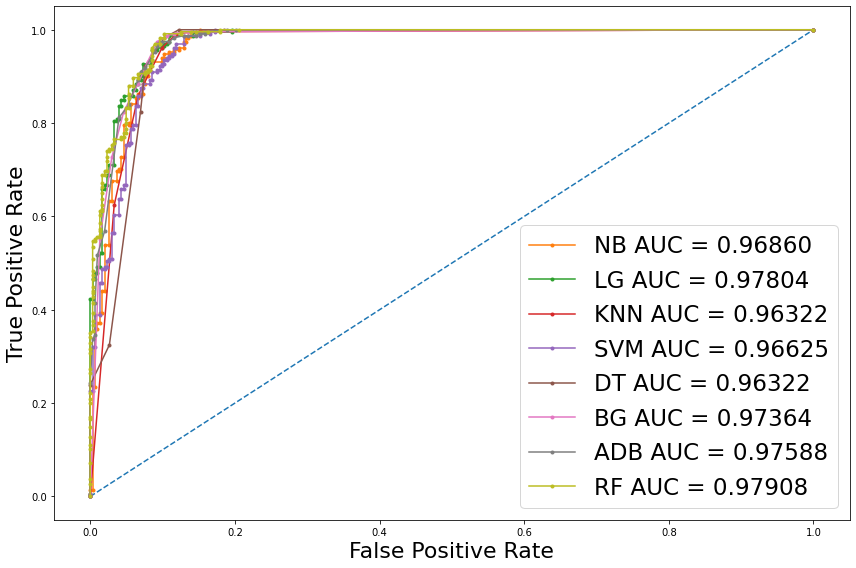

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(rndm_fpr, rndm_tpr, linestyle='--')
plt.plot(mnb_fpr, mnb_tpr, marker='.', label='NB AUC = %0.5f' % mnb_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='LG AUC = %0.5f' % lg_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN AUC = %0.5f' % knn_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM AUC = %0.5f' % svm_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT AUC = %0.5f' % knn_auc)
plt.plot(bg_fpr, bg_tpr, marker='.', label='BG AUC = %0.5f' % bg_auc)
plt.plot(adb_fpr, adb_tpr, marker='.', label='ADB AUC = %0.5f' % adb_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF AUC = %0.5f' % rf_auc)

# Title
#plt.title('ROC Plot', fontsize=22)
# Axis labels
plt.xlabel('False Positive Rate', fontsize=22)
plt.ylabel('True Positive Rate', fontsize=22)
# Show legend
plt.legend(fontsize=23)
# Save Fig
save_fig("dga_wo_gscv_roc")
# Show plot
plt.show()